In [ ]:
# prompt: import all the libraries required for building a machine learning mode

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('salary.csv')

print(df.head())
print(df.info())
df.columns

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

Unique values in 'workclass':
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Unique values in 'education':
education
HS-grad         10501
Some-colle

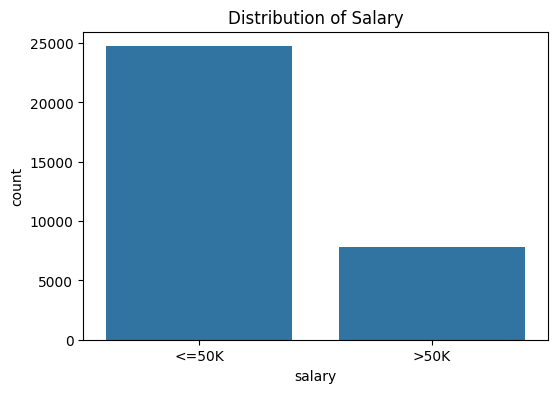

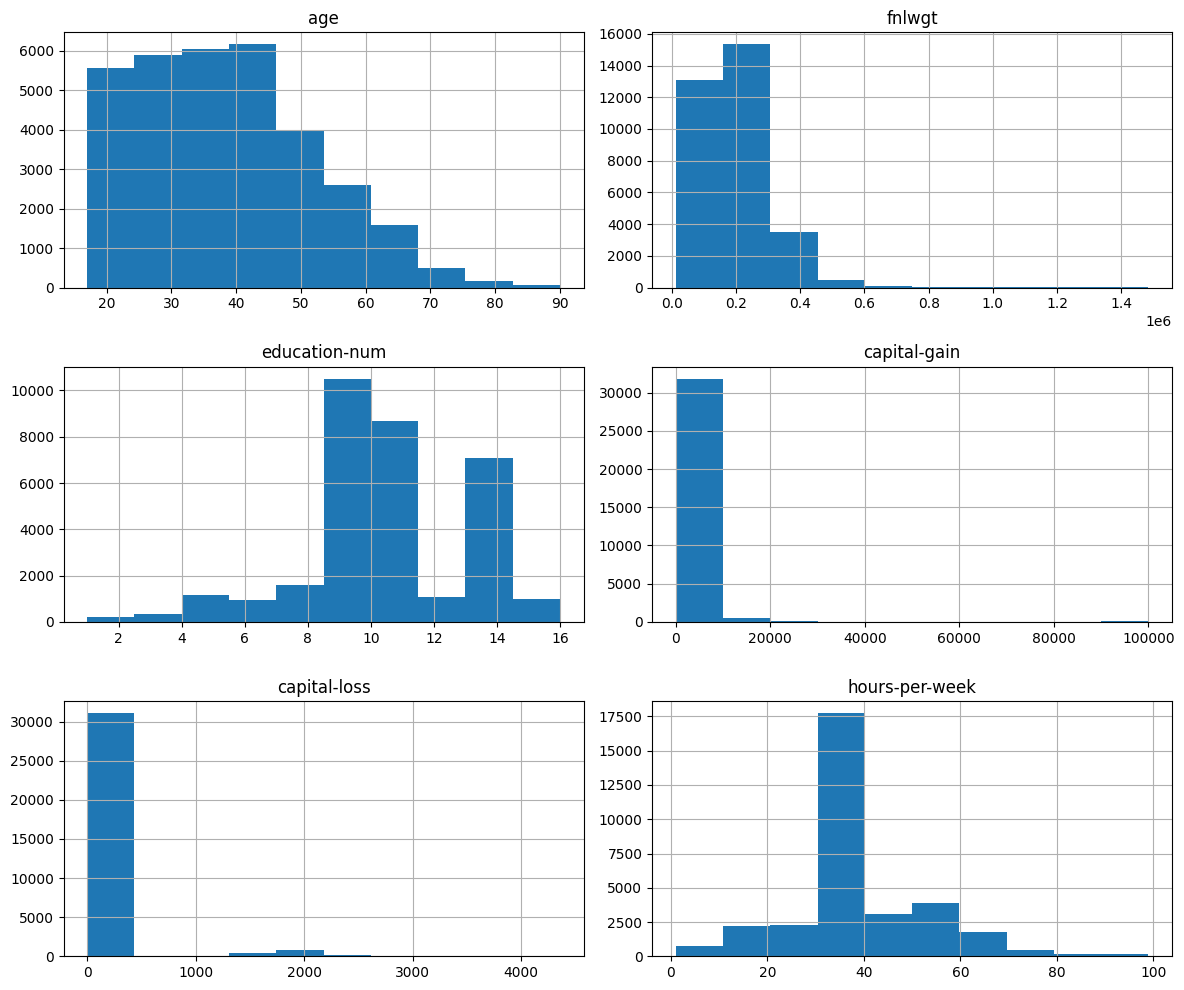

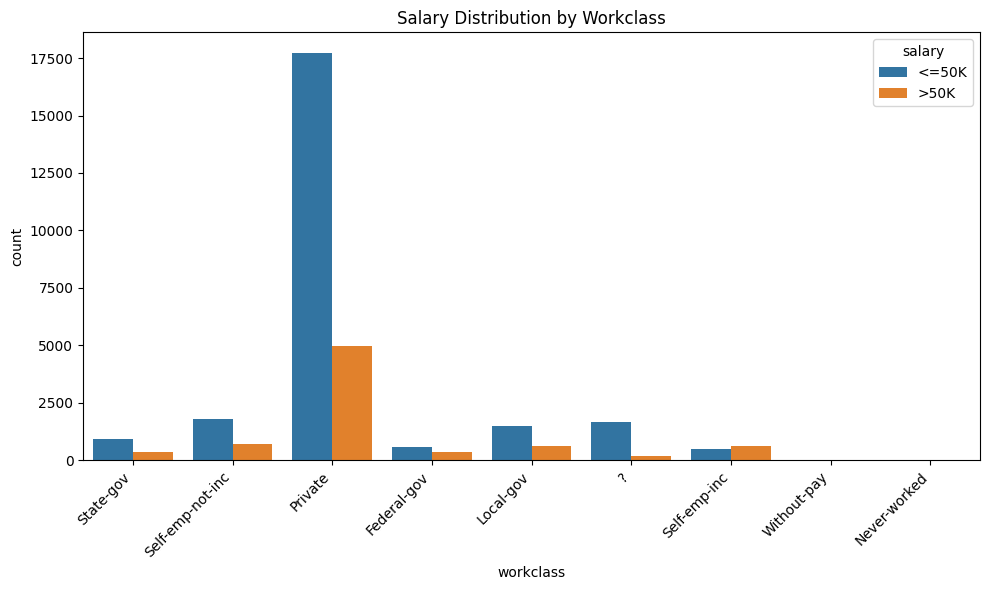


Categorical Features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
Numerical Features: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [ ]:
# prompt: explore and clean the data

import matplotlib.pyplot as plt
import numpy as np
# Handle missing values - let's see which columns have missing values
print(df.isnull().sum())

# For simplicity, let's drop rows with missing values.
# In a real-world scenario, you might consider imputation strategies.
df.dropna(inplace=True)

# Check if missing values are removed
print(df.isnull().sum())

# Explore categorical variables - count unique values
for col in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())

# Some columns might have leading/trailing spaces, let's strip them
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Re-check unique values after stripping spaces
for col in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']:
    print(f"\nUnique values in '{col}' after stripping spaces:")
    print(df[col].value_counts())

# Basic statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(df.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='salary', data=df)
plt.title('Distribution of Salary')
plt.show()

# Visualize the distribution of numerical features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Explore relationships between categorical features and the target variable (optional)
# For example, workclass vs salary
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='salary', data=df)
plt.title('Salary Distribution by Workclass')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# We are done with basic exploration and cleaning (handling NaNs, stripping spaces, basic visualizations).
# The next steps would typically involve feature engineering and model building.

# Define features (X) and target (y)
X = df.drop('salary', axis=1)
y = df['salary']

# Identify categorical and numerical features for preprocessing
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=np.number).columns

print("\nCategorical Features:", list(categorical_features))
print("Numerical Features:", list(numerical_features))

In [ ]:
# prompt: encode categorical data

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore' is useful for handling unseen categories during testing

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Apply the transformations
X_processed = preprocessor.fit_transform(X)

# You can see the shape of the transformed data
print("\nShape of original features:", X.shape)
print("Shape of processed features:", X_processed.shape)

# If you want to see the processed data (especially useful for understanding OneHotEncoder output),
# you might need to convert it back to a DataFrame, which can be complex due to dynamic column names from OneHotEncoder.
# For now, we'll proceed with the transformed numpy array X_processed.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of original features: (32561, 14)
Shape of processed features: (32561, 108)

Shape of X_train: (26048, 108)
Shape of X_test: (6513, 108)
Shape of y_train: (26048,)
Shape of y_test: (6513,)


In [ ]:
# prompt: train test split

# The train-test split has already been performed in the preceding code.
# The resulting training and testing sets are:
# X_train, X_test, y_train, y_test

# You can optionally check the distribution of the target variable in the splits to ensure stratification worked.
# This is especially important for imbalanced datasets.
print("\nDistribution of 'salary' in y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribution of 'salary' in y_test:")
print(y_test.value_counts(normalize=True))

# The shapes of the resulting splits were also printed in the preceding code.
# You can re-print them if needed:
# print("\nShape of X_train:", X_train.shape)
# print("Shape of X_test:", X_test.shape)
# print("Shape of y_train:", y_train.shape)
# print("Shape of y_test:", y_test.shape)

# Now you can proceed with training a model using X_train and y_train,
# and evaluating it using X_test and y_test.

# Example of training a Logistic Regression model:
# model = LogisticRegression(solver='liblinear', random_state=42) # solver='liblinear' often preferred for smaller datasets
# model.fit(X_train, y_train)

# Example of making predictions and evaluating the model:
# y_pred = model.predict(X_test)
# print("\nAccuracy:", accuracy_score(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


Distribution of 'salary' in y_train:
salary
<=50K    0.759175
>50K     0.240825
Name: proportion, dtype: float64

Distribution of 'salary' in y_test:
salary
<=50K    0.759251
>50K     0.240749
Name: proportion, dtype: float64


In [ ]:
# prompt: evaluate model

# Example of training a Logistic Regression model:
model = LogisticRegression(solver='liblinear', random_state=42) # solver='liblinear' often preferred for smaller datasets
model.fit(X_train, y_train)

# Example of making predictions and evaluating the model:
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8561338860740059

Confusion Matrix:
 [[4604  341]
 [ 596  972]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4945
        >50K       0.74      0.62      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513




Top 20 Features by Absolute Coefficient Value:
capital-gain                         2.259872
native-country_South                 1.641705
occupation_Priv-house-serv           1.608435
marital-status_Married-civ-spouse    1.315053
education_Preschool                  1.176950
relationship_Own-child               1.144353
sex_Female                           1.128836
marital-status_Never-married         1.103351
native-country_Cambodia              1.081042
relationship_Wife                    1.047183
native-country_Columbia              1.038677
workclass_Without-pay                1.022134
marital-status_Married-AF-spouse     1.006442
native-country_Dominican-Republic    0.976568
occupation_Farming-fishing           0.949399
relationship_Other-relative          0.929815
marital-status_Separated             0.873124
occupation_Exec-managerial           0.834850
native-country_France                0.778466
education-num                        0.745356
dtype: float64


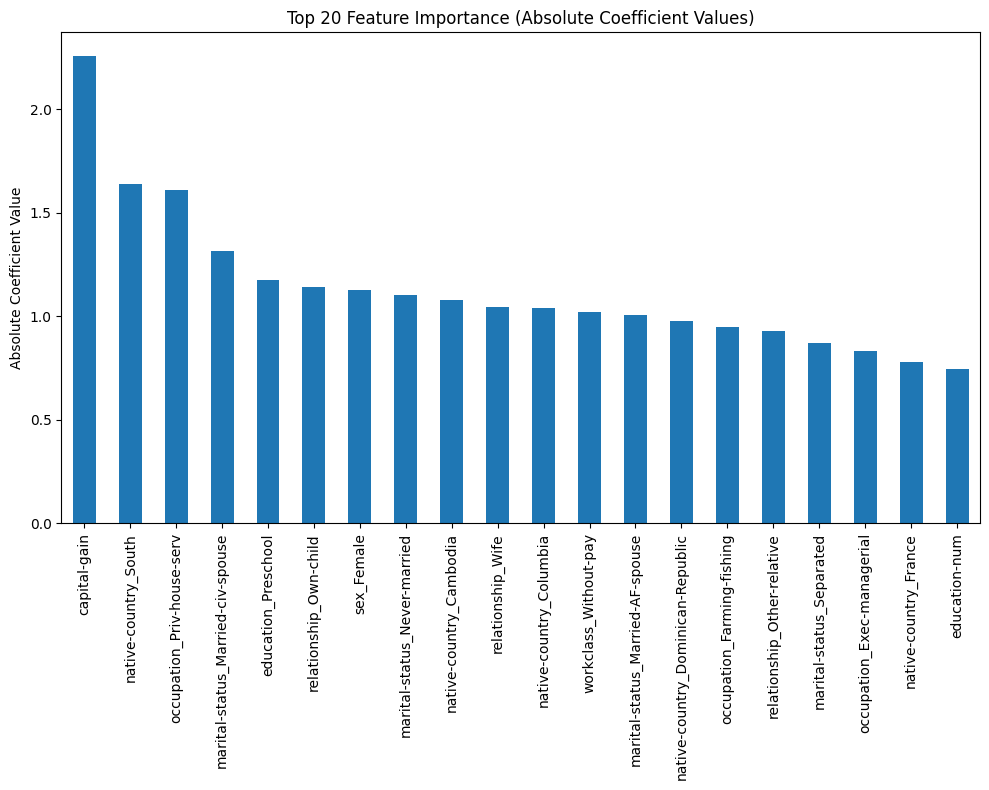


Top 20 Features with Signed Coefficients:


,0
capital-gain,2.259872
native-country_South,-1.641705
occupation_Priv-house-serv,-1.608435
marital-status_Married-civ-spouse,1.315053
education_Preschool,-1.176950
relationship_Own-child,-1.144353
sex_Female,-1.128836
marital-status_Never-married,-1.103351
native-country_Cambodia,1.081042
relationship_Wife,1.047183


In [ ]:
# prompt: feature importance

import pandas as pd
import matplotlib.pyplot as plt
# The trained model is 'model'.
# For Logistic Regression, feature importance can be interpreted from the coefficients.

# Get the coefficients
coefficients = model.coef_[0] # For binary classification, there's one row of coefficients

# Get the feature names after preprocessing
# Numerical features retain their original names
numerical_feature_names = list(numerical_features)

# Categorical features are one-hot encoded, so we need to get the column names from the OneHotEncoder
# This requires fitting the preprocessor first (which was done in the preceding code)
# Then access the fitted encoder and its get_feature_names_out method
categorical_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Combine all feature names in the order they appear in the processed data
feature_names = numerical_feature_names + categorical_feature_names

# Create a pandas Series to easily view coefficients with feature names
feature_importance = pd.Series(coefficients, index=feature_names)

# Sort the features by the absolute value of their coefficients to see the most influential ones
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

print("\nTop 20 Features by Absolute Coefficient Value:")
print(sorted_feature_importance.head(20))

# You can also visualize the feature importance
plt.figure(figsize=(10, 8))
sorted_feature_importance.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importance (Absolute Coefficient Values)')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# If you want to see the signed coefficients (indicating direction of influence)
signed_sorted_feature_importance = feature_importance.loc[sorted_feature_importance.head(20).index]
print("\nTop 20 Features with Signed Coefficients:")
signed_sorted_feature_importance

In [ ]:
# prompt: create a file to use the trained model

import pandas as pd
# Save the trained model and the preprocessor
import joblib

# Ensure the 'models' directory exists
import os
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(model, 'models/logistic_regression_model.pkl')
joblib.dump(preprocessor, 'models/preprocessor.pkl')

print("Model and preprocessor saved successfully.")

# --- Now, create a new file (or cell in Colab) for using the trained model ---

# This part would typically be in a separate script or notebook for inference/prediction

# Load the saved model and preprocessor
loaded_model = joblib.load('models/logistic_regression_model.pkl')
loaded_preprocessor = joblib.load('models/preprocessor.pkl')

print("Model and preprocessor loaded successfully.")

# Example of new data (a single instance)
# Create a DataFrame with the same column names and data types as the original training data (X)
new_data = pd.DataFrame({
    'age': [35],
    'workclass': ['Private'],
    'fnlwgt': [226802],
    'education': ['Bachelors'],
    'education-num': [13],
    'marital-status': ['Married-civ-spouse'],
    'occupation': ['Exec-managerial'],
    'relationship': ['Husband'],
    'race': ['White'],
    'sex': ['Male'],
    'capital-gain': [0],
    'capital-loss': [0],
    'hours-per-week': [45],
    'native-country': ['United-States']
})

# Preprocess the new data using the loaded preprocessor
# It's crucial to use the same preprocessor fitted on the training data
new_data_processed = loaded_preprocessor.transform(new_data)

# Make a prediction using the loaded model
prediction = loaded_model.predict(new_data_processed)

# If you want the probability
prediction_proba = loaded_model.predict_proba(new_data_processed)

print(f"\nNew data:\n{new_data}")
print(f"\nPrediction: {prediction[0]}")
# The classes of the model determine what '0' and '1' represent
# You can check model.classes_ to see the mapping
print(f"Prediction Probability: {prediction_proba[0]}")

# Example with multiple new instances
multiple_new_data = pd.DataFrame({
    'age': [40, 25, 50],
    'workclass': ['Private', 'Self-emp-inc', 'Federal-gov'],
    'fnlwgt': [150000, 200000, 300000],
    'education': ['Masters', 'Some-college', 'HS-grad'],
    'education-num': [14, 10, 9],
    'marital-status': ['Divorced', 'Never-married', 'Married-civ-spouse'],
    'occupation': ['Sales', 'Tech-support', 'Protective-serv'],
    'relationship': ['Not-in-family', 'Own-child', 'Wife'],
    'race': ['Black', 'Asian-Pac-Islander', 'White'],
    'sex': ['Female', 'Male', 'Female'],
    'capital-gain': [1000, 0, 5000],
    'capital-loss': [0, 200, 0],
    'hours-per-week': [35, 50, 40],
    'native-country': ['United-States', 'India', 'Mexico']
})

# Preprocess the new data
multiple_new_data_processed = loaded_preprocessor.transform(multiple_new_data)

# Make predictions
multiple_predictions = loaded_model.predict(multiple_new_data_processed)
multiple_prediction_proba = loaded_model.predict_proba(multiple_new_data_processed)

print(f"\nMultiple new data:\n{multiple_new_data}")
print(f"\nPredictions: {multiple_predictions}")
print(f"Prediction Probabilities:\n{multiple_prediction_proba}")

# You can map the predicted class labels back to the original string labels
# For example, if model.classes_ is ['<=50K', '>50K']
predicted_labels = multiple_predictions # No need to map, the predictions are already the string labels
print(f"\nPredicted Labels: {predicted_labels}")

Model and preprocessor saved successfully.
Model and preprocessor loaded successfully.

New data:
   age workclass  fnlwgt  education  education-num      marital-status  \
0   35   Private  226802  Bachelors             13  Married-civ-spouse   

        occupation relationship   race   sex  capital-gain  capital-loss  \
0  Exec-managerial      Husband  White  Male             0             0   

   hours-per-week native-country  
0              45  United-States  

Prediction: >50K
Prediction Probability: [0.31672207 0.68327793]

Multiple new data:
   age     workclass  fnlwgt     education  education-num      marital-status  \
0   40       Private  150000       Masters             14            Divorced   
1   25  Self-emp-inc  200000  Some-college             10       Never-married   
2   50   Federal-gov  300000       HS-grad              9  Married-civ-spouse   

        occupation   relationship                race     sex  capital-gain  \
0            Sales  Not-in-family       

In [ ]:
# prompt: download the trained model for ui pourpose

from google.colab import files
files.download('models/logistic_regression_model.pkl')
files.download('models/preprocessor.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: test accuracy of my model

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print("\n--- Model Evaluation on Test Set ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


--- Model Evaluation on Test Set ---
Accuracy: 0.8561338860740059

Confusion Matrix:
 [[4604  341]
 [ 596  972]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4945
        >50K       0.74      0.62      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [ ]:
import sklearn
print(sklearn.__version__)



1.6.1
